In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import scikits.audiolab as al

from scipy.stats import signaltonoise

import signalTools_beta as sT
%matplotlib inline

### Read WAV

In [30]:
wavF= "/home/florencia/whales/data/mySamples/whales/tapes/NPW/J/wav/WAV_2009-07-13-0050_007-48kHz.wav"
#'/home/florencia/whales/data/mySamples/whales/tapes/NPW/J/wav/WAV_2009-07-13-0050_008-48kHz.wav'
#2009-08-11-WAV_0083_001-48kHz_320-336sec.wav'
#wavF = '/home/florencia/whales/reports/NLP/manuscript/supplement/wavs/J_f50-6_/WAV_2009-07-13-0050_006-48kHz.wav'
#wavF = '/home/florencia/whales/data/mySamples/wavs/piano/PianotrioinCminorop.1no.3_Beethoven1905-36824873.mp3'

waveform, samplingR, = sT.wav2waveform(wavF)
WFlen = len(waveform)
tf = WFlen*1.0/samplingR
t = np.linspace(0, tf, WFlen)

print( "lenght:", WFlen, tf, ", sampling freq:", samplingR)

lenght: 20029228 417.275583333 , sampling freq: 48000


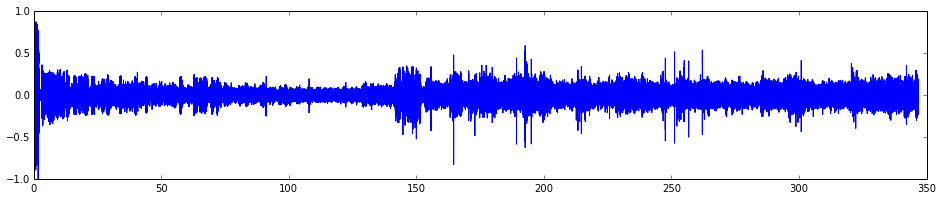

In [5]:
# plot waveform
plt.figure(figsize=(16,3))
plt.plot( t, waveform)

In [31]:
print(tc_0, tc_f, ix_0, ix_f)
print(len(t[ix_0:ix_f]), len(cuttedWF), len(waveform), len(t))


335 348 16080000 16704000
624000 624000 20029228 20029228


cutting indexes 16080000 16704000
waveform length: 20029228 min: -1.0 ,max: 0.979528604625
/home/florencia/whales/data/mySamples/whales/tapes/NPW/J/wav/WAV_2009-07-13-0050_007-48kHz_335-348sec.wav


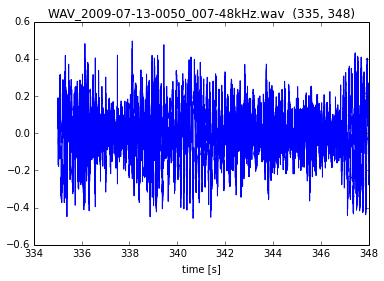

In [33]:
# cutting parameters
tc_0 = 5*60 + 35
tc_f = 5*60 + 48 #tc_0 + 30 #tc_0 + 60.0*3.0

idLab = '_%d-%dsec'%(tc_0, tc_f) #out file name label

ix_0 = int(tc_0*WFlen/tf) # begining index
ix_f = int(tc_f*WFlen/tf) # ending index

print( "cutting indexes", ix_0, ix_f)

print( "waveform length:", WFlen, "min:", np.min(waveform), ",max:", np.max(waveform))#, ", time: (%.1f, %.2f)"%(time[0],time[-1])
fig, ax = plt.subplots()#figsize=(10,3))
cuttedWF=waveform[ix_0:ix_f]
ax.plot(t[ix_0:ix_f], cuttedWF)
#ax.xlim(13,16)
ax.set_xlabel('time [s]')
ax.set_title('%s  (%d, %d)'%(os.path.basename(wavF), tc_0, tc_f ))
plName = wavF.replace('.wav', idLab+'.png') #avF.split('.')[0]+idLab
fig.show()
#fig.savefig(plName, bbox_inches='tight')

outWavFN = wavF.replace('.wav', idLab+'.wav') #avF.split('.')[0]+idLab
print(outWavFN)


## Save cutted wav

In [34]:
# write wav file

format = al.Format('wav')

new_file = al.Sndfile(outWavFN, 'w', format, 1, samplingR) # declare a writing audio file
new_file.write_frames(cuttedWF)
new_file.close()

print( "find me here:", os.path.abspath(outWavFN))

find me here: /home/florencia/whales/data/mySamples/whales/tapes/NPW/J/wav/WAV_2009-07-13-0050_007-48kHz_335-348sec.wav


### Fast spectro, cutomize with B

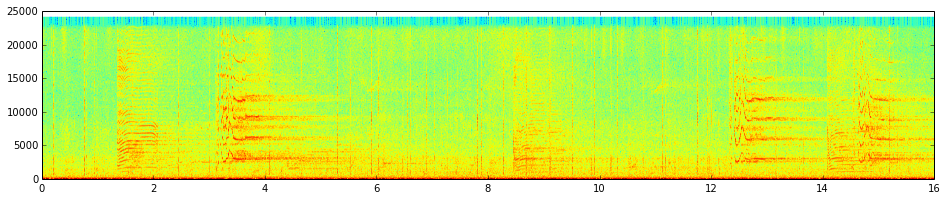

In [6]:
# setings
power = 9

N = 2**power
over = int(N*0.8)
winN = 'hamming'
winN = 'hanning'
win =  np.hamming(N)

# spectro
plt.figure(figsize=(16, 3))
A = plt.specgram(cuttedWF, Fs = samplingR, NFFT = N, noverlap = over, window = win)[0]
#pl.ylim(50,20000)

##Signal 2 noise ratio

In [9]:
wF =  '/home/florencia/whales/data/mySamples/whales/tapes/NPW/B/wav/WAV_0111_001-48kHz.wav'
wavDN = os.path.dirname(wF)
bN = os.path.basename(wF).replace('.wav', '')
imgD = wavDN.replace('/wav', '/images')

## waveform
fs, waveForm0 = sT.wavfile.read(wF)
print("wavefrom:", np.shape(waveForm0), "sampling rate:", fs)

wavefrom: (16640880,) sampling rate: 48000


/usr/lib/python2.7/dist-packages/scipy/io/wavfile.py:172: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [19]:
### signal to noise functions

def stepwiseSignal2Noise(y, step=100, overlap=0):
    '''
    slices the signal in intervals of size step 
    and for each section computes the signal to noise ratio
    '''
    assert step > overlap, "overlap should be larger than step"
    return np.array([ signaltonoise(y[ i : i + step ]) for i in np.arange(0, len(y) - step, step - overlap) ] )

def stepwiseMeanAbs(y, step=500, overlap=0):
    '''slices the signal in intervals of size step and
    for each section computes the mean'''
    return np.array( [ np.mean(np.abs(y[ i : i + step ])) for i in np.arange(0, len(y)-step, step-overlap) ] )


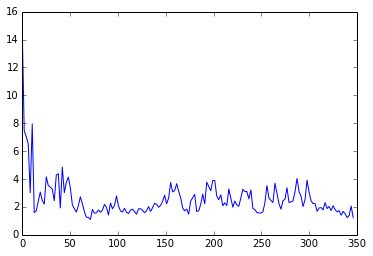

In [23]:
s2nWaveF = stepwiseSignal2Noise(waveForm0, step=100)
s2nWaveF_mean = stepwiseMeanAbs(s2nWaveF, step=500)

tf = len(waveForm0)/fs
t=np.linspace(0, tf, len(s2nWaveF_mean))
plt.plot(t,s2nWaveF_mean)

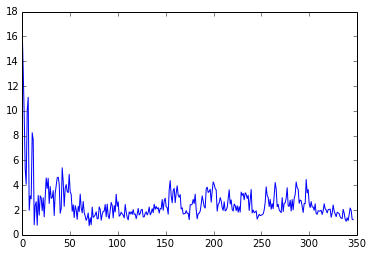

In [25]:
step=1000
s2nWaveF_mean = stepwiseMeanAbs(s2nWaveF, step=500)
t = np.linspace(0, tf, len(s2nWaveF_mean))
plt.plot( t, s2nWaveF_mean )

In [28]:
y_fil=sT.butter_bandpass_filter(waveForm0, 1000, 22*1000, fs)


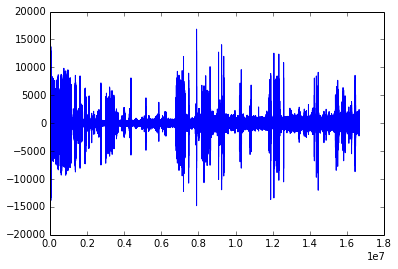

In [29]:
plt.plot(y_fil)

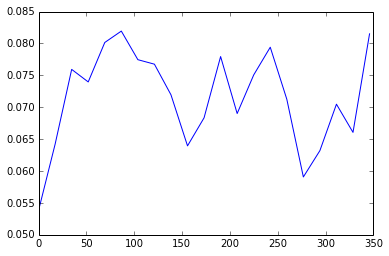

In [38]:

#s2nWaveF = stepwiseSignal2Noise(y_fil, step=100)
s2nWaveF_mean = stepwiseMeanAbs(s2nWaveF, step=8000, overlap=100)

tf = len(waveForm0)/fs
t=np.linspace(0, tf, len(s2nWaveF_mean))
plt.plot(t,s2nWaveF_mean)